# Problem Statement: Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import warnings 
warnings.simplefilter('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform  
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('advertising.csv')

# Understanding the dataset: 

In [3]:
df.head()

,Sno,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Sno', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Variables: 
        1. Independent variables: TV, Radio, Newspaper
        2. Dependent variables: Sales

In [5]:
df = df.drop('Sno', axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Observation: 
    
    All of the variables are in float format. 

# Checking the null values: 

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null or missing values, we can persue with the dataset. 

# Exploratory Data Analysis: Univariate and Multivariate

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


Observations: 
    
    1. The standard deviation of each variable is quite high --> Implying there are outliers available.  
    2. The data distrubution is skewed. It is not normally distributed. 

In [10]:
### Checking the correlation among the features. 
df.corr().T

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [11]:
df.corr()['sales'].T

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

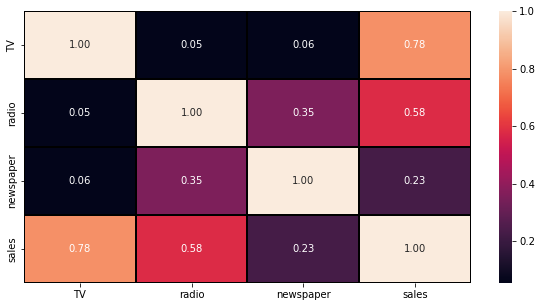

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.25, linecolor  = "black", fmt='.2f') 

Observation: 
    
    1. TV is highly positively correlated with the sales. It implies that Ads are sold on TV maximum number of times in comparison to the news sold on radio and newspaper. 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

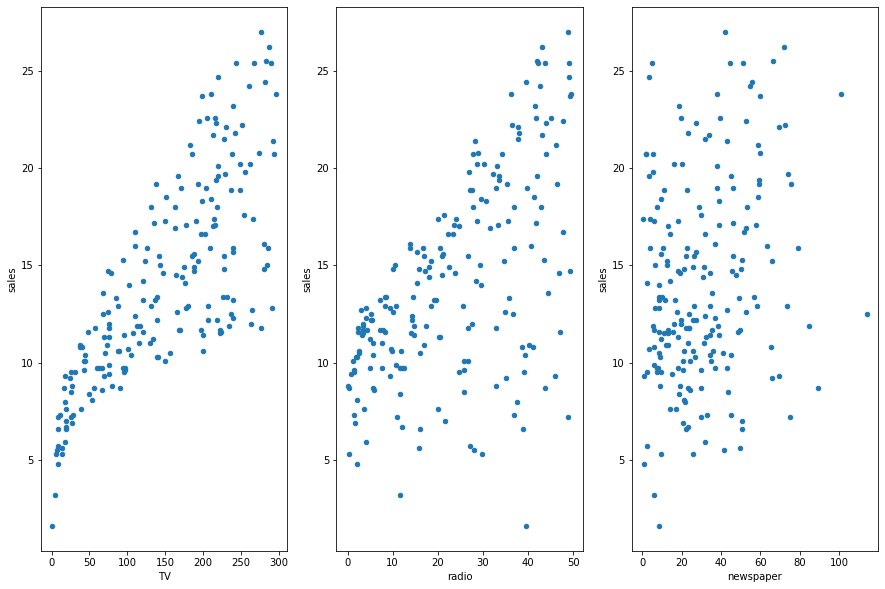

In [15]:
fig, axs = plt.subplots (1,3)
df.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize =(15,10))
df.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
df.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

Observation: 

    1. It depicts the correlation among the varaibles and sales.
    2. TV has a clear positive correlation with sales, it follows a positive growth. 
    3. Radio and newspaper are positivelt correlated but there is no clear relationship between the two. 


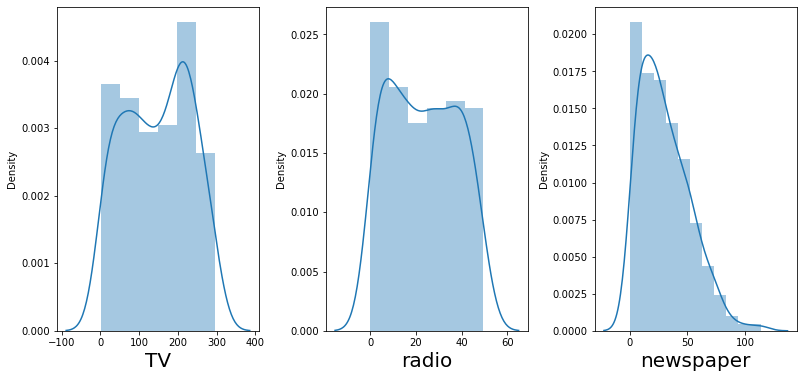

In [17]:
plt.figure(figsize = (15,10), facecolor = 'white')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <4: #here 8 is the number of features
        ax = plt.subplot (2,4, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

Observation: 
    
    There is a skewness in the distribution. There is no bell-shaped curve here which shows that distribution is not normally distributed. 

In [18]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:ylabel='Density'>

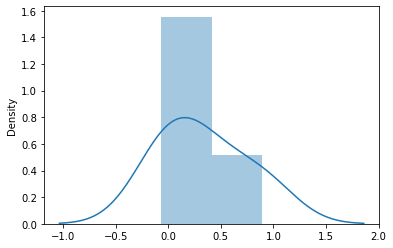

In [20]:
sns.distplot(df.skew())

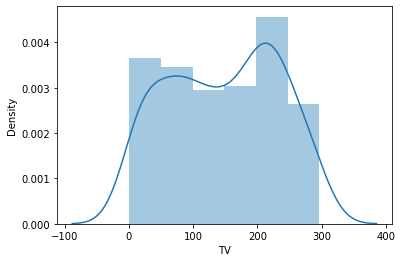

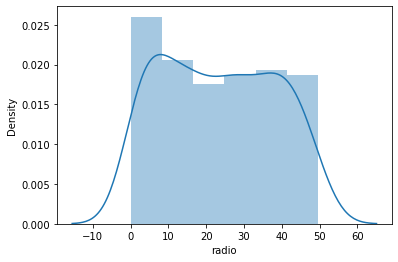

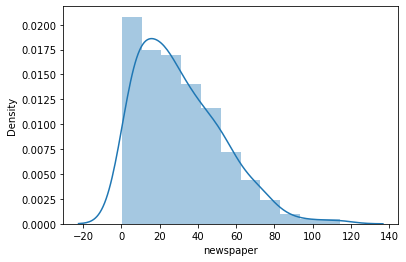

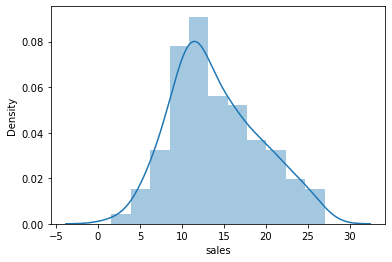

In [19]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Observation: 
    The distribution of the varaible is quite normally distributed. There is no skewness available in the dataset. Keeping the threshold ranging from -3 to 3. 

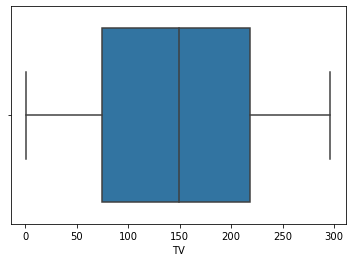

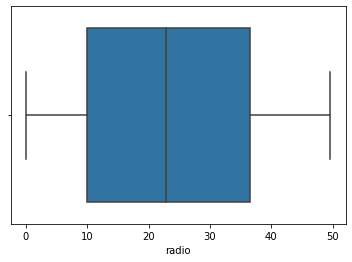

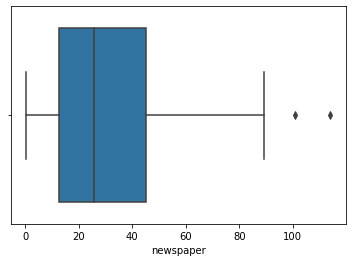

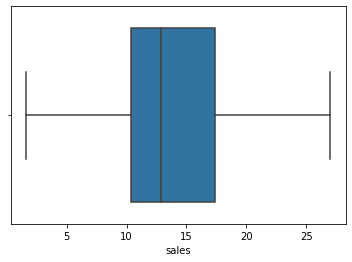

In [21]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [22]:
#### Removing outliers and skenwess from the distributio and the data. 

In [24]:
from scipy.stats import zscore 
z = zscore(df)
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [27]:
df_new = df[(z<3).all(axis=1)]

In [28]:
df_new.shape

(198, 4)

In [29]:
df.shape

(200, 4)

In [30]:
df = df_new

Note: Two rows 16 and 101 does have outliers available, now it is removed. 

In [32]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [33]:
x = power_transform(x, method ='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [34]:
x = pd.DataFrame(x, columns = ['TV', 'radio', 'newspaper'])

<AxesSubplot:ylabel='Density'>

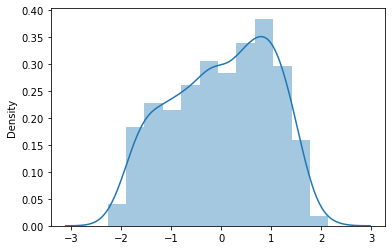

In [35]:
sns.distplot(x)

Observation: 
    All the skewness and outliers are successfully removed from the distibution. Now the data is normally ditributed. 

In [36]:
## Scaling the variables 
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

In [38]:
### Checking for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor (x_s, i) for i in range (x_s.shape[1])]
vif["features"] = x.columns  #here, vif and features are column names
vif

,vif,features
0,1.002693,TV
1,1.088710,radio
2,1.087940,newspaper


Note: Multicollinerity is not there in the data. Dataset is good to go for the training of the model now. 

# Model Building 

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size = .25, random_state = 148)

1. Linear Regression 

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.fit(x_test, y_test)
print ("The training score is: ",(lr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",lr.score(x_test, y_test)*100) # Training Score
y_pred = lr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(lr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(lr,x,y, cv=5).mean())*100)))

The training score is:  89.30218492704441
The testing score is:  88.3871834391401
The R2 score is:  88.3871834391401
The MAE is:  1.3396929279355738
The MSE is:  1.7997553331301406
The CV score is:  89.58270968555071
Difference between R2 score and CV score is:  -1.1955262464106085


2. SVR 

In [45]:
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)
print ("The training score is: ",(svr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",svr.score(x_test, y_test)*100) # Training Score
y_pred = svr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(svr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(svr,x,y, cv=5).mean())*100)))

The training score is:  89.68576559873367
The testing score is:  87.01715265405896
The R2 score is:  87.01715265405896
The MAE is:  1.340948578987043
The MSE is:  1.902960008696272
The CV score is:  88.84910535184875
Difference between R2 score and CV score is:  -1.831952697789788


3. KNN-R

In [46]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)
print ("The training score is: ",(knn.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",knn.score(x_test, y_test)*100) # Training Score
y_pred = knn.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(knn,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(knn,x,y, cv=5).mean())*100)))

The training score is:  86.63850775111814
The testing score is:  93.69098439788239
The R2 score is:  93.69098439788239
The MAE is:  0.8979999999999997
The MSE is:  1.3265556905007794
The CV score is:  93.86878724057907
Difference between R2 score and CV score is:  -0.17780284269667845


4. Ridge

In [47]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(x_train, y_train)
ridge.fit(x_test, y_test)
print ("The training score is: ",(ridge.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",(ridge.score(x_test, y_test)*100)) # Training Score
y_pred = ridge.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(ridge,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(ridge,x,y, cv=5).mean())*100)))

The training score is:  89.31039061657596
The testing score is:  88.37856056774393
The R2 score is:  88.37856056774393
The MAE is:  1.337644869401885
The MSE is:  1.8004233958230262
The CV score is:  89.5973895393285
Difference between R2 score and CV score is:  -1.2188289715845713


5. Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr.fit(x_test, y_test)
print ("The training score is: ",(gbr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",(gbr.score(x_test, y_test)*100)) # Training Score
y_pred = gbr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(gbr,x,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(gbr,x,y, cv=5).mean())*100)))

The training score is:  95.63786779357184
The testing score is:  99.99284503373306
The R2 score is:  99.99284503373306
The MAE is:  0.033096655544153
The MSE is:  0.044673345947733804
The CV score is:  97.82753253121491
Difference between R2 score and CV score is:  2.174663886690155


# SV Regressor works best for this dataset since the difference between R2 score & CV is the least amongst all the models (-1.83)

# Hyper parameter Tuning 

In [50]:
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)
print ("The training score is: ",(svr.score(x_train, y_train))*100) # Training Score
print ("The testing score is: ",svr.score(x_test, y_test)*100) # Training Score
y_pred = svr.predict(x_test)
print("The R2 score is: ",(r2_score(y_test, y_pred)*100)) #R2 Score
print("The MAE is: ", (mean_absolute_error(y_test, y_pred))) #MAE
print ("The MSE is: ",(np.sqrt(mean_squared_error(y_test,y_pred)))) #MSE
print ("The CV score is: ",(cross_val_score(svr,x_s,y, cv=5).mean())*100) #Cross Validation Score
print ("Difference between R2 score and CV score is: ",((r2_score(y_test, y_pred)*100)-((cross_val_score(svr,x_s,y, cv=5).mean())*100)))

The training score is:  89.68576559873367
The testing score is:  87.01715265405896
The R2 score is:  87.01715265405896
The MAE is:  1.340948578987043
The MSE is:  1.902960008696272
The CV score is:  88.84794953695278
Difference between R2 score and CV score is:  -1.8307968828938215


# Saving the model with Grid Search CV

In [51]:
import joblib
joblib.dump(svr,'Advertising.pkl')

['Advertising.pkl']